1. Скачайте тренировочную и тестовою часть датасета Fashion MNIST  
2. Постройте архитектуру модели, используя свёрточные слои, слои регуляризации и один финальный полносвязный слой  
3. Обучите модель до необходимого качества. Если сеть не обучается до необходимого качества, попробуйте поменять архитектуру сети, варьируя параметры свёрток, количество каналов, количество свёрточных слоёв, слои регуляризации, тип оптимайзера и т. д.

In [1]:
import numpy as np
import torch
import torchvision as tv
import matplotlib.pyplot as plt
from torch import nn
import time

In [2]:
BATCH_SIZE=256

In [3]:
transforms = tv.transforms.Compose([ 
    tv.transforms.Resize(32), 
    tv.transforms.ToTensor() 
])

In [4]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=transforms, download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=transforms, download=True)
train_ = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_ = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [5]:
train_dataset[0][1]

9

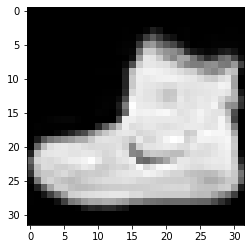

In [6]:
image = next(iter(train_dataset))[0]
plt.imshow(image.squeeze(), cmap='gray')

In [7]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=5),
    nn.ReLU(), 
    nn.MaxPool2d(2, stride=2),
    nn.Dropout(0.3),
    nn.Conv2d(32, 128, kernel_size=5), 
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Dropout(0.3),
    nn.Conv2d(128, 256, kernel_size=5),
    nn.Flatten(), 
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10) 
)

In [8]:
from torchsummary import summary

summary(model, input_size=(1, 32, 32), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
           Dropout-4           [-1, 32, 14, 14]               0
            Conv2d-5          [-1, 128, 10, 10]         102,528
              ReLU-6          [-1, 128, 10, 10]               0
         MaxPool2d-7            [-1, 128, 5, 5]               0
           Dropout-8            [-1, 128, 5, 5]               0
            Conv2d-9            [-1, 256, 1, 1]         819,456
          Flatten-10                  [-1, 256]               0
           Linear-11                  [-1, 128]          32,896
             ReLU-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
Total params: 957,002
Trainable params:

In [9]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [10]:
def train(net, train_iter, test_iter, optimizer, num_epochs):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [11]:
lr, num_epochs = 0.001, 10
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_, test_, optimizer, num_epochs)

epoch 1, loss 0.0025, train acc 0.766, test acc 0.828, time 42.3 sec
epoch 2, loss 0.0015, train acc 0.856, test acc 0.866, time 41.4 sec
epoch 3, loss 0.0013, train acc 0.879, test acc 0.878, time 42.0 sec
epoch 4, loss 0.0012, train acc 0.889, test acc 0.885, time 42.6 sec
epoch 5, loss 0.0011, train acc 0.898, test acc 0.884, time 41.8 sec
epoch 6, loss 0.0010, train acc 0.903, test acc 0.892, time 41.0 sec
epoch 7, loss 0.0010, train acc 0.907, test acc 0.898, time 41.6 sec
epoch 8, loss 0.0009, train acc 0.912, test acc 0.895, time 42.4 sec
epoch 9, loss 0.0009, train acc 0.915, test acc 0.897, time 42.8 sec
epoch 10, loss 0.0009, train acc 0.918, test acc 0.890, time 40.6 sec
